D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

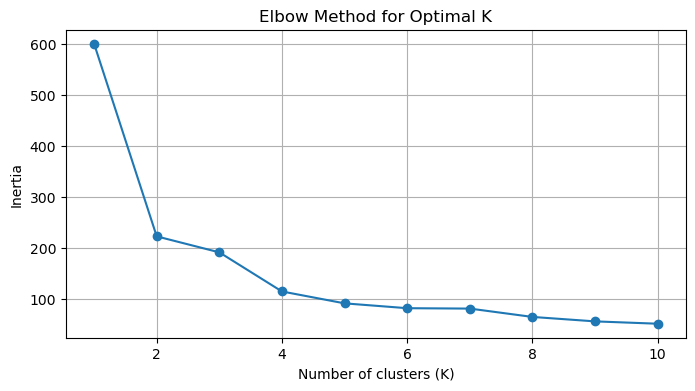

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


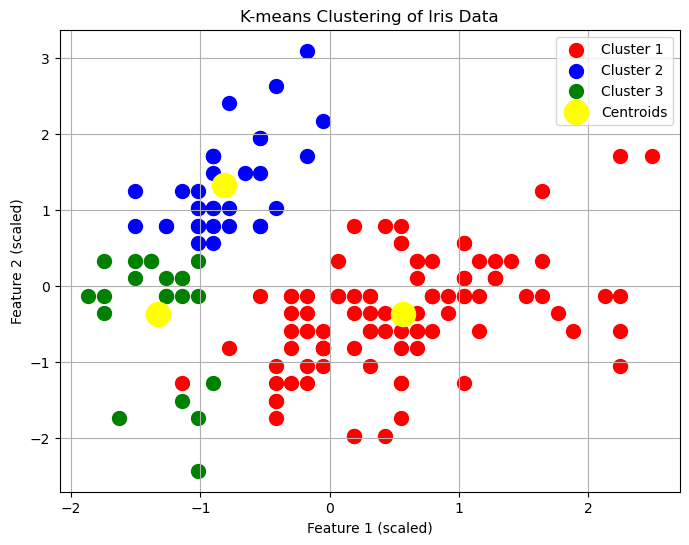

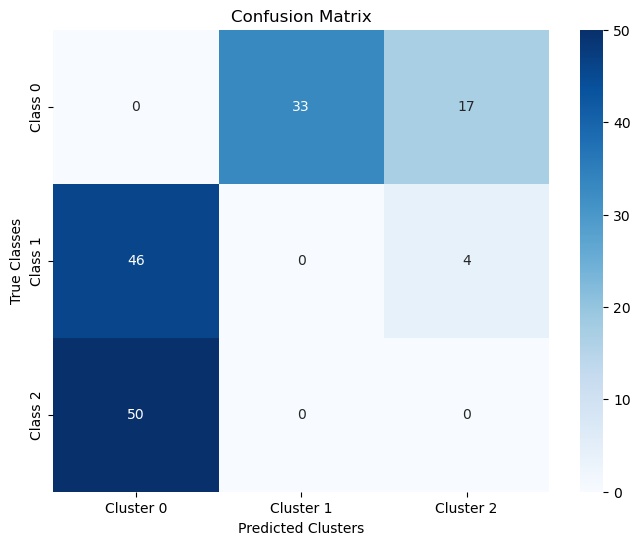

In [1]:
# 第一步：导入所需的模块
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 第二步：加载并标准化鸢尾花数据集
iris = load_iris()
X = iris.data  # 特征数据
y = iris.target  # 实际标签（用于后续比较）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 第三步：使用“肘部法则”选择K值
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 绘制肘部图
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# 第四步：使用选择后的K值初始化分类器
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# 第五步：绘制聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

# 绘制聚类中心
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('K-means Clustering of Iris Data')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.grid()
plt.show()

# 第六步：评价模型
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y, y_kmeans)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Clusters')
plt.ylabel('True Classes')
plt.show()


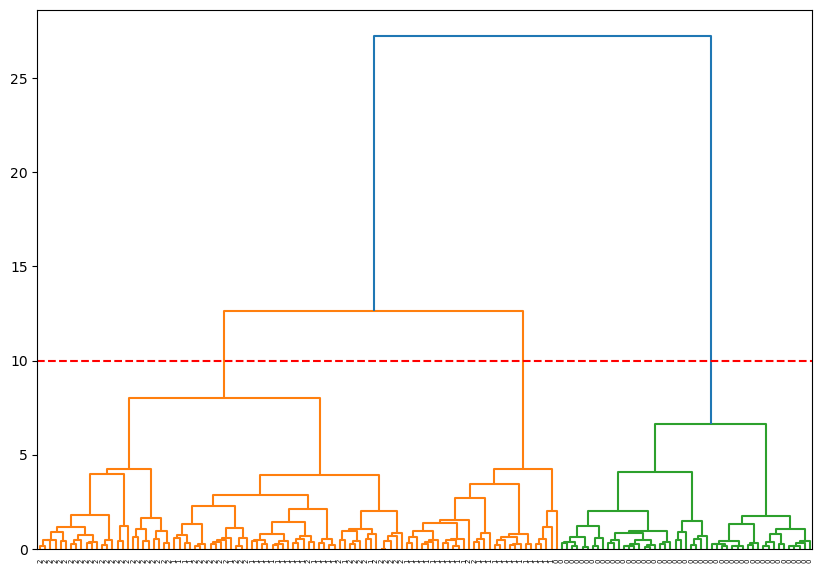

In [2]:
## 层次聚类

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# 加载鸢尾花数据
iris = load_iris()
data = iris.data

# 数据标准化
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# 使用层次聚类
linked = linkage(data_std, 'ward')

# 绘制树状图
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=iris.target,
            distance_sort='descending',
            show_leaf_counts=True)
# 添加红色水平线
plt.axhline(y=10, color='r', linestyle='--')
plt.show()


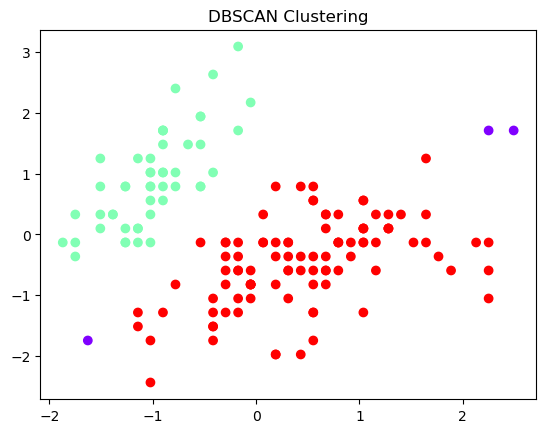

In [3]:
## DBSCAN密度聚类

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 加载鸢尾花数据
iris = load_iris()
data = iris.data

# 数据标准化
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# 使用DBSCAN聚类
dbscan = DBSCAN(eps=1, min_samples=5)
labels = dbscan.fit_predict(data_std)

# 绘制聚类结果
plt.scatter(data_std[:, 0], data_std[:, 1], c=labels, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.show()
